<a href="https://colab.research.google.com/github/shivangisahay14/MachineLearning-Internshala/blob/main/DE_Categorical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Internshala ML/Transformed_Housing_Data.csv')
print(dataset)

               ID  Sale Price  ...  Ever Renovated  Years Since Renovation
0      7129300520      221900  ...              No                       0
1      6414100192      538000  ...             Yes                      26
2      5631500400      180000  ...              No                       0
3      2487200875      604000  ...              No                       0
4      1954400510      510000  ...              No                       0
...           ...         ...  ...             ...                     ...
21604   263000018      360000  ...              No                       0
21605  6600060120      400000  ...              No                       0
21606  1523300141      402101  ...              No                       0
21607   291310100      400000  ...              No                       0
21608  1523300157      325000  ...              No                       0

[21609 rows x 21 columns]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  int64  
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  int64  
 5   Lot Area (in Sqft)                         21609 non-null  int64  
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [ ]:
dataset['Condition of the House'].value_counts()       #ordinal categorical variable

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

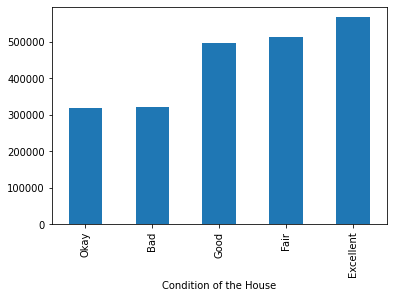

In [ ]:
dataset.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

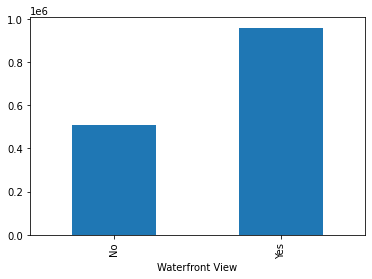

In [ ]:
dataset.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar')

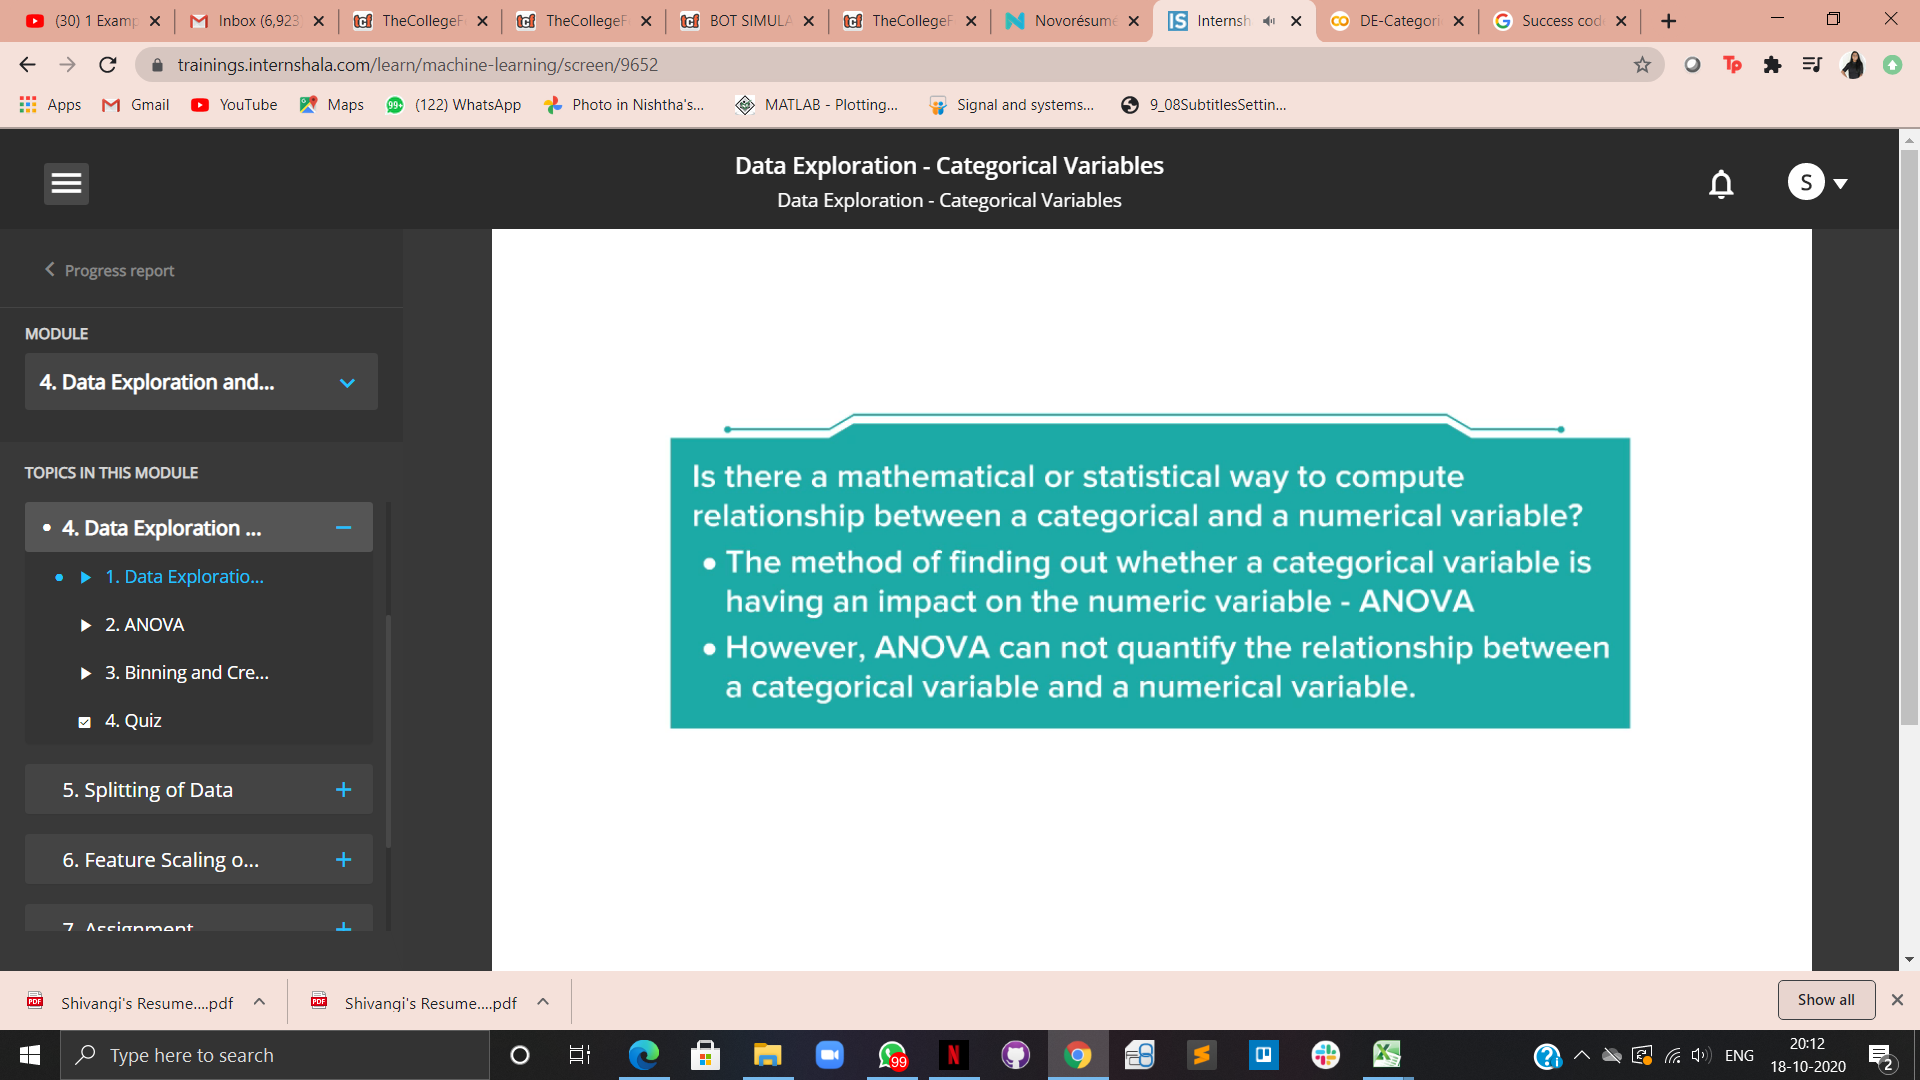

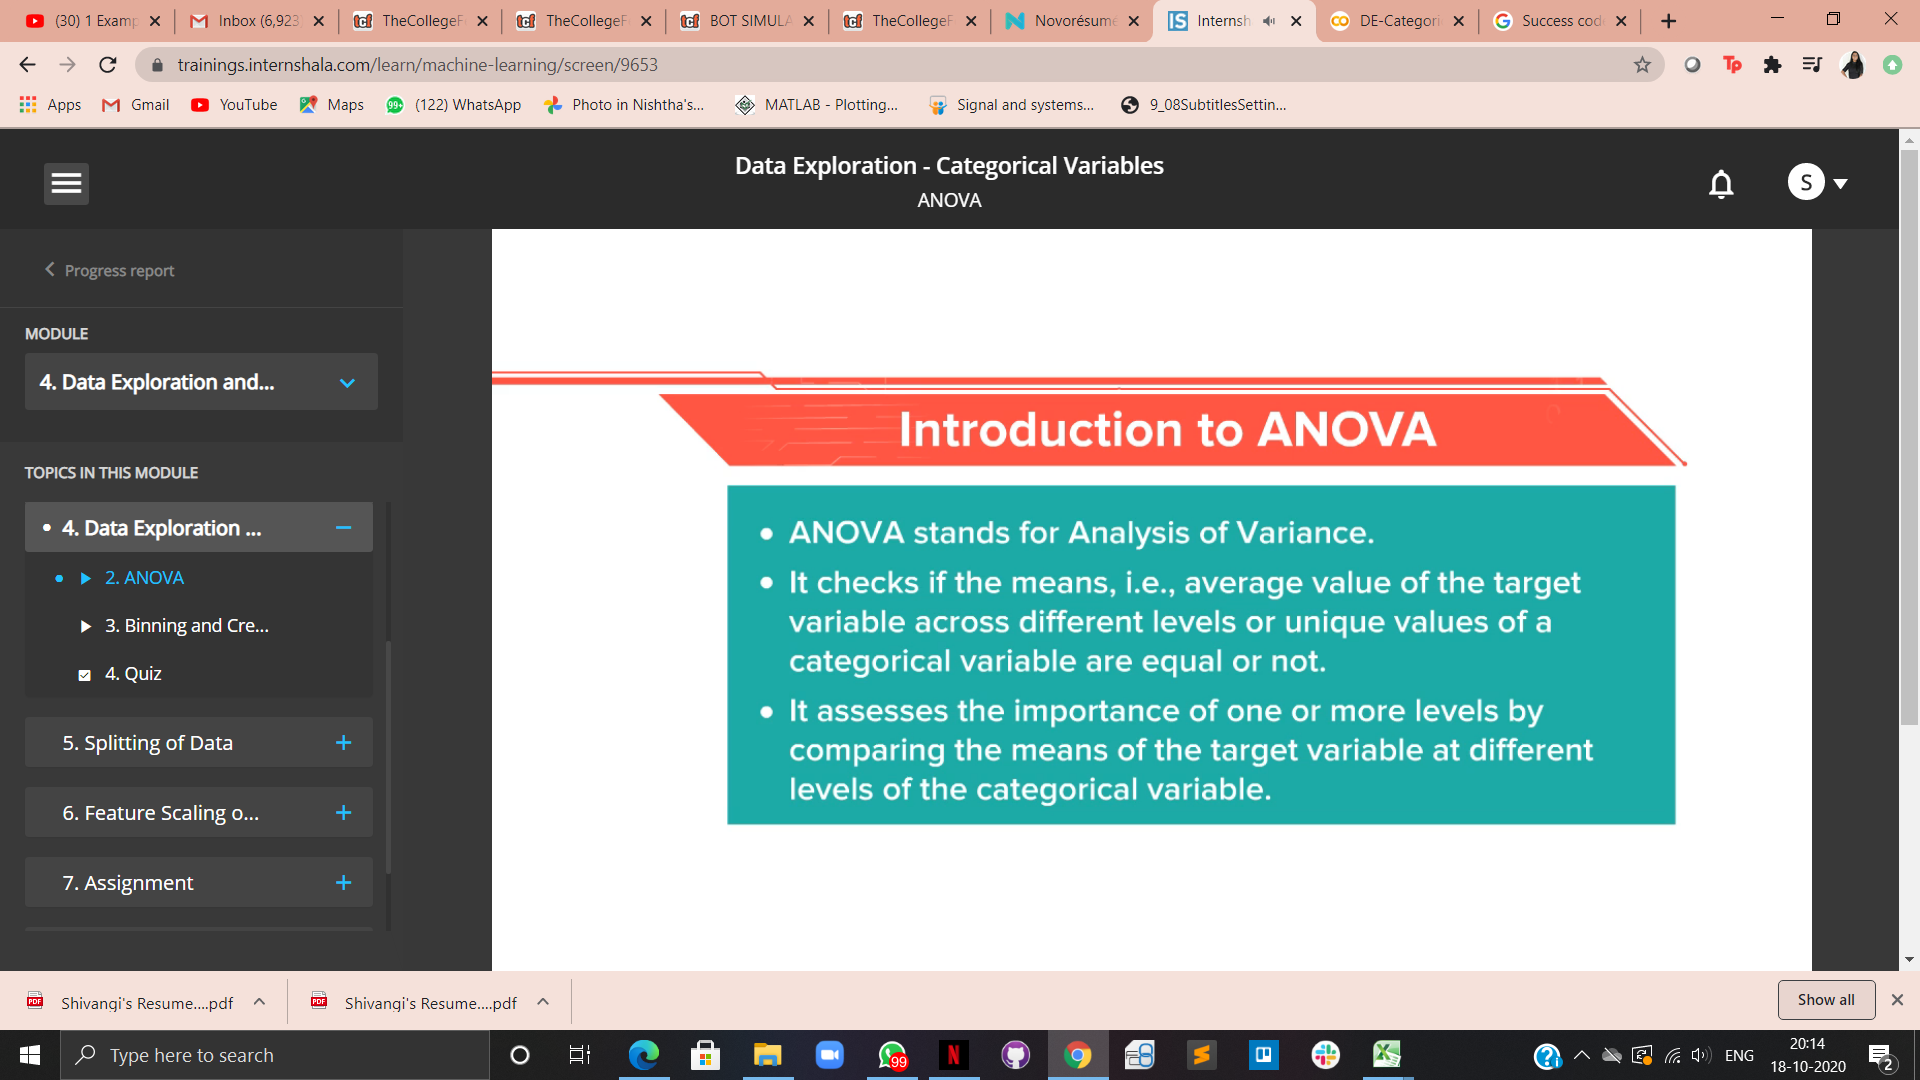

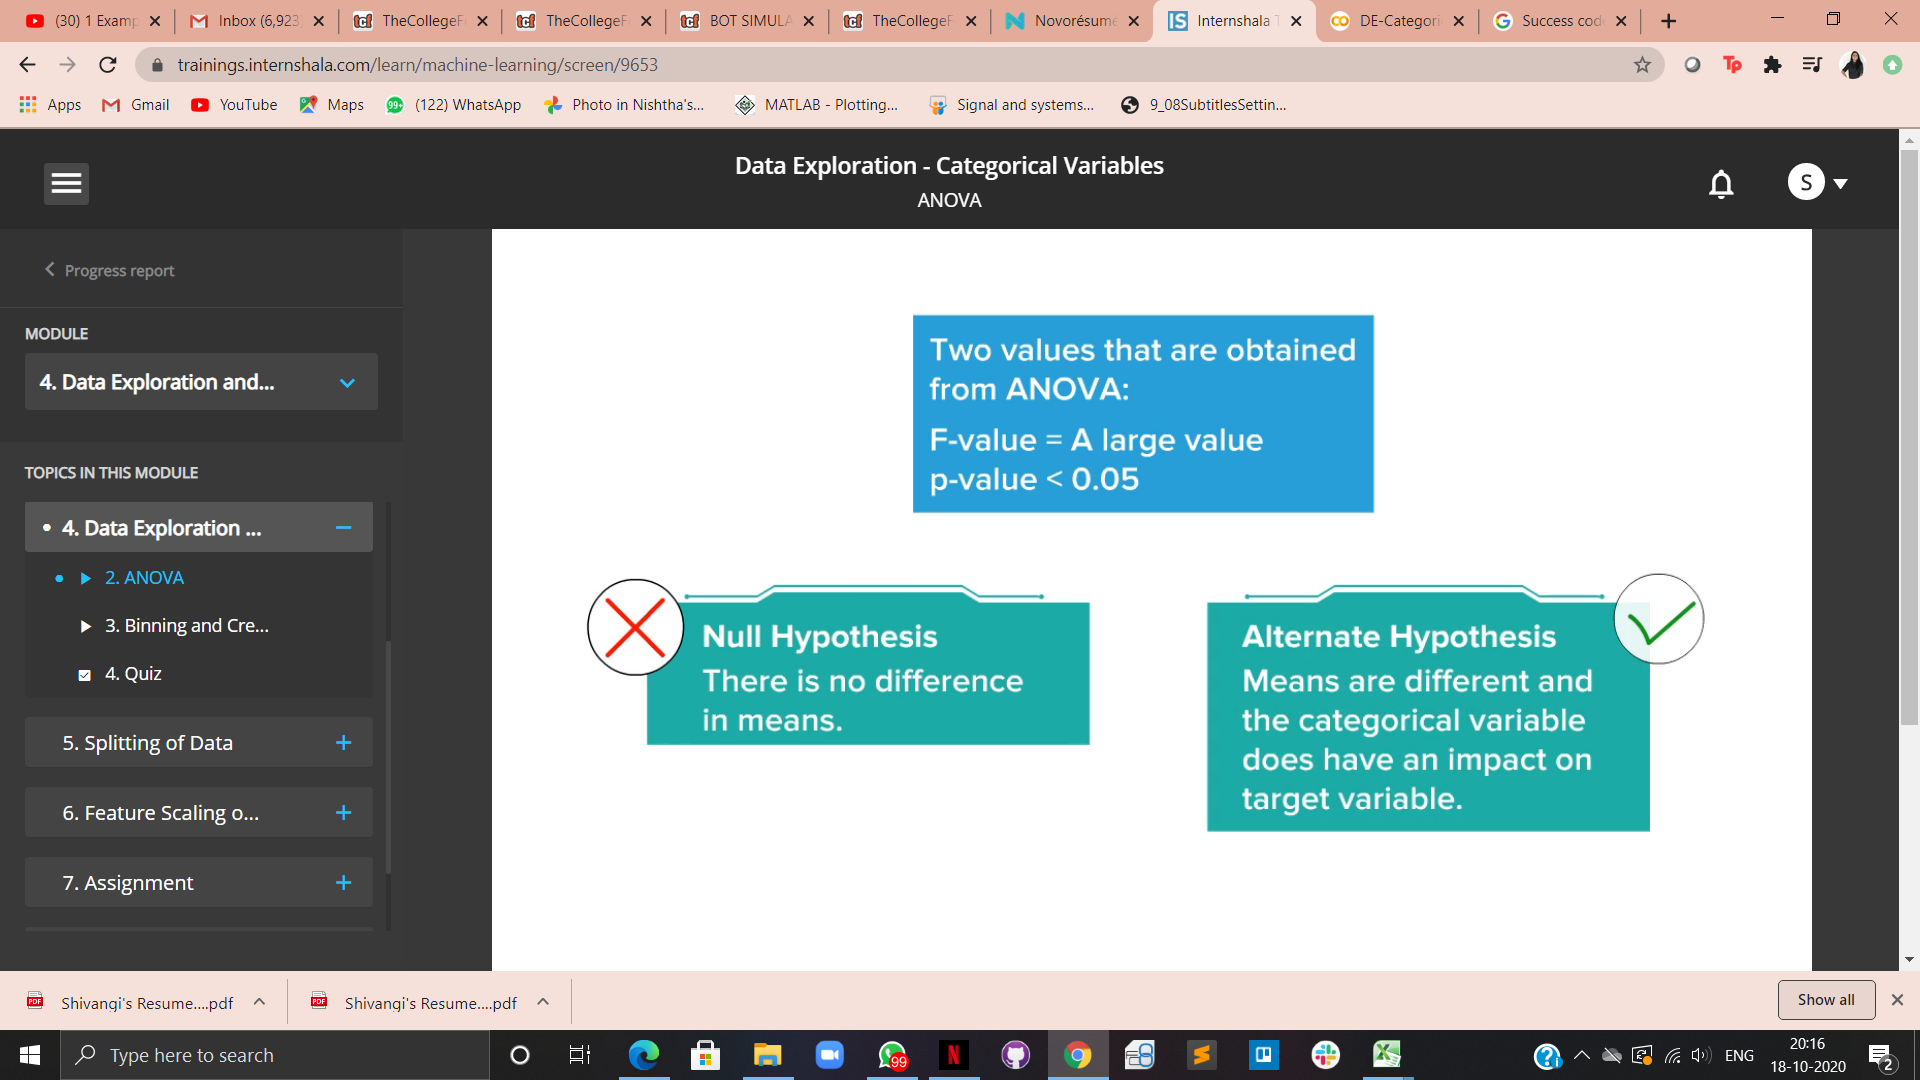

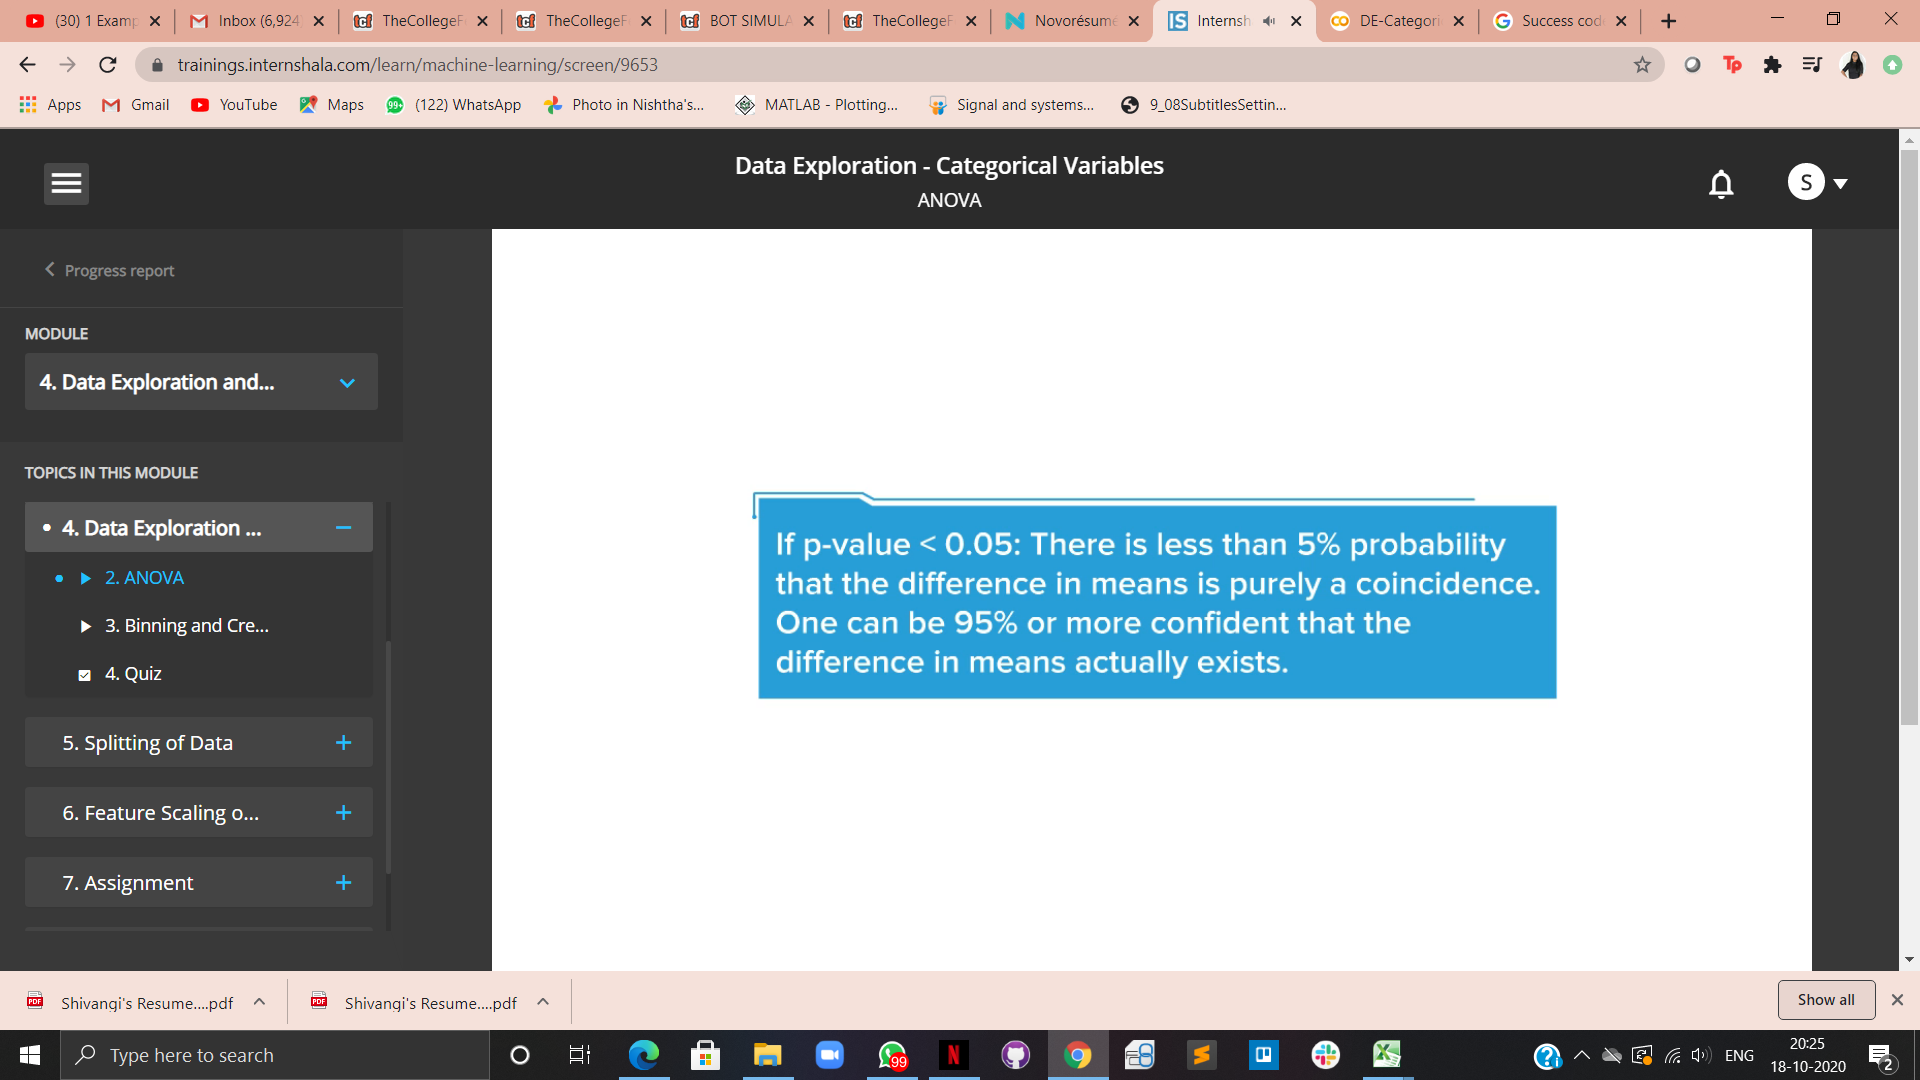

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Renaming the variables 

In [ ]:
dataset=dataset.rename(columns={'Sale Price':'Sale_Price'})

In [ ]:
dataset=dataset.rename(columns={'Condition of the House':'Condition_of_the_House'})
dataset=dataset.rename(columns={'Ever Renovated':'Ever_Renovated'})
dataset=dataset.rename(columns={'Waterfront View':'Waterfront_View'})

In [ ]:
mod=ols('Sale_Price ~ Condition_of_the_House',data=dataset).fit()
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [ ]:
print(Anova_table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


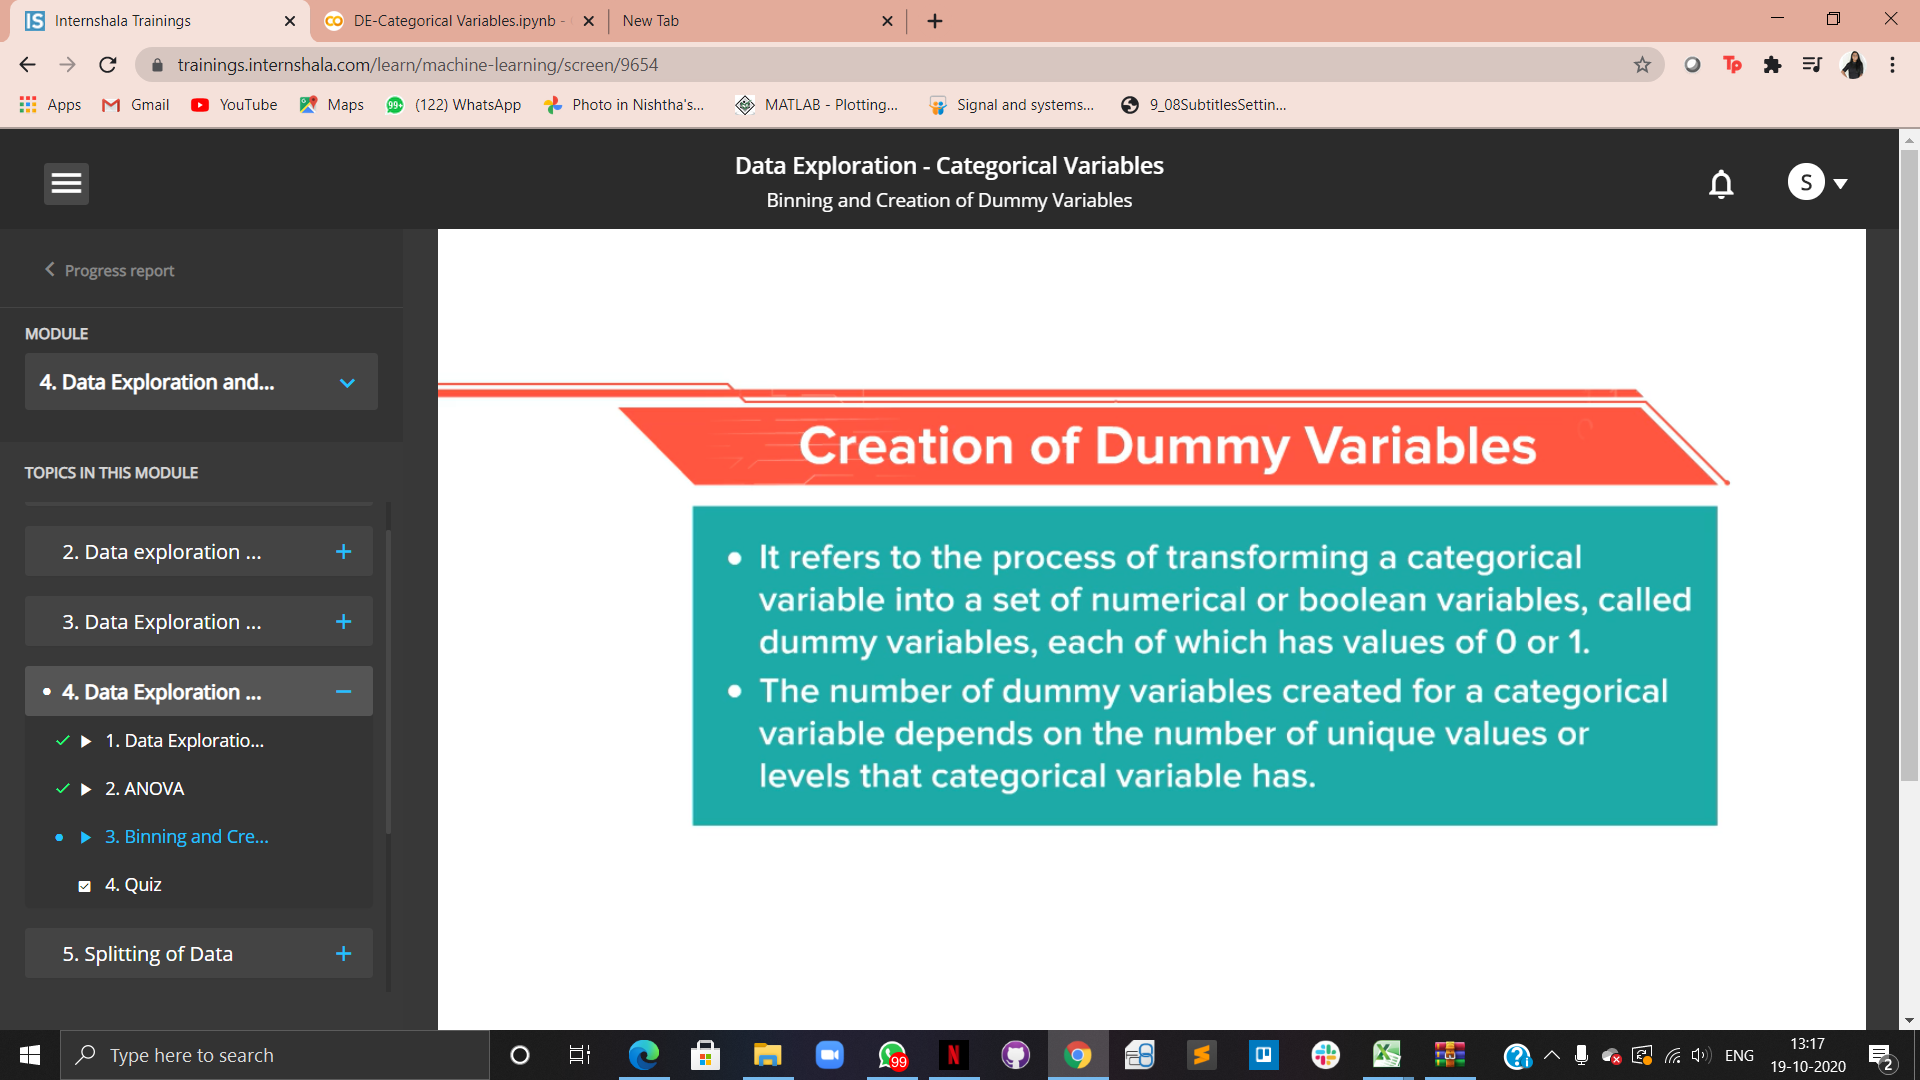

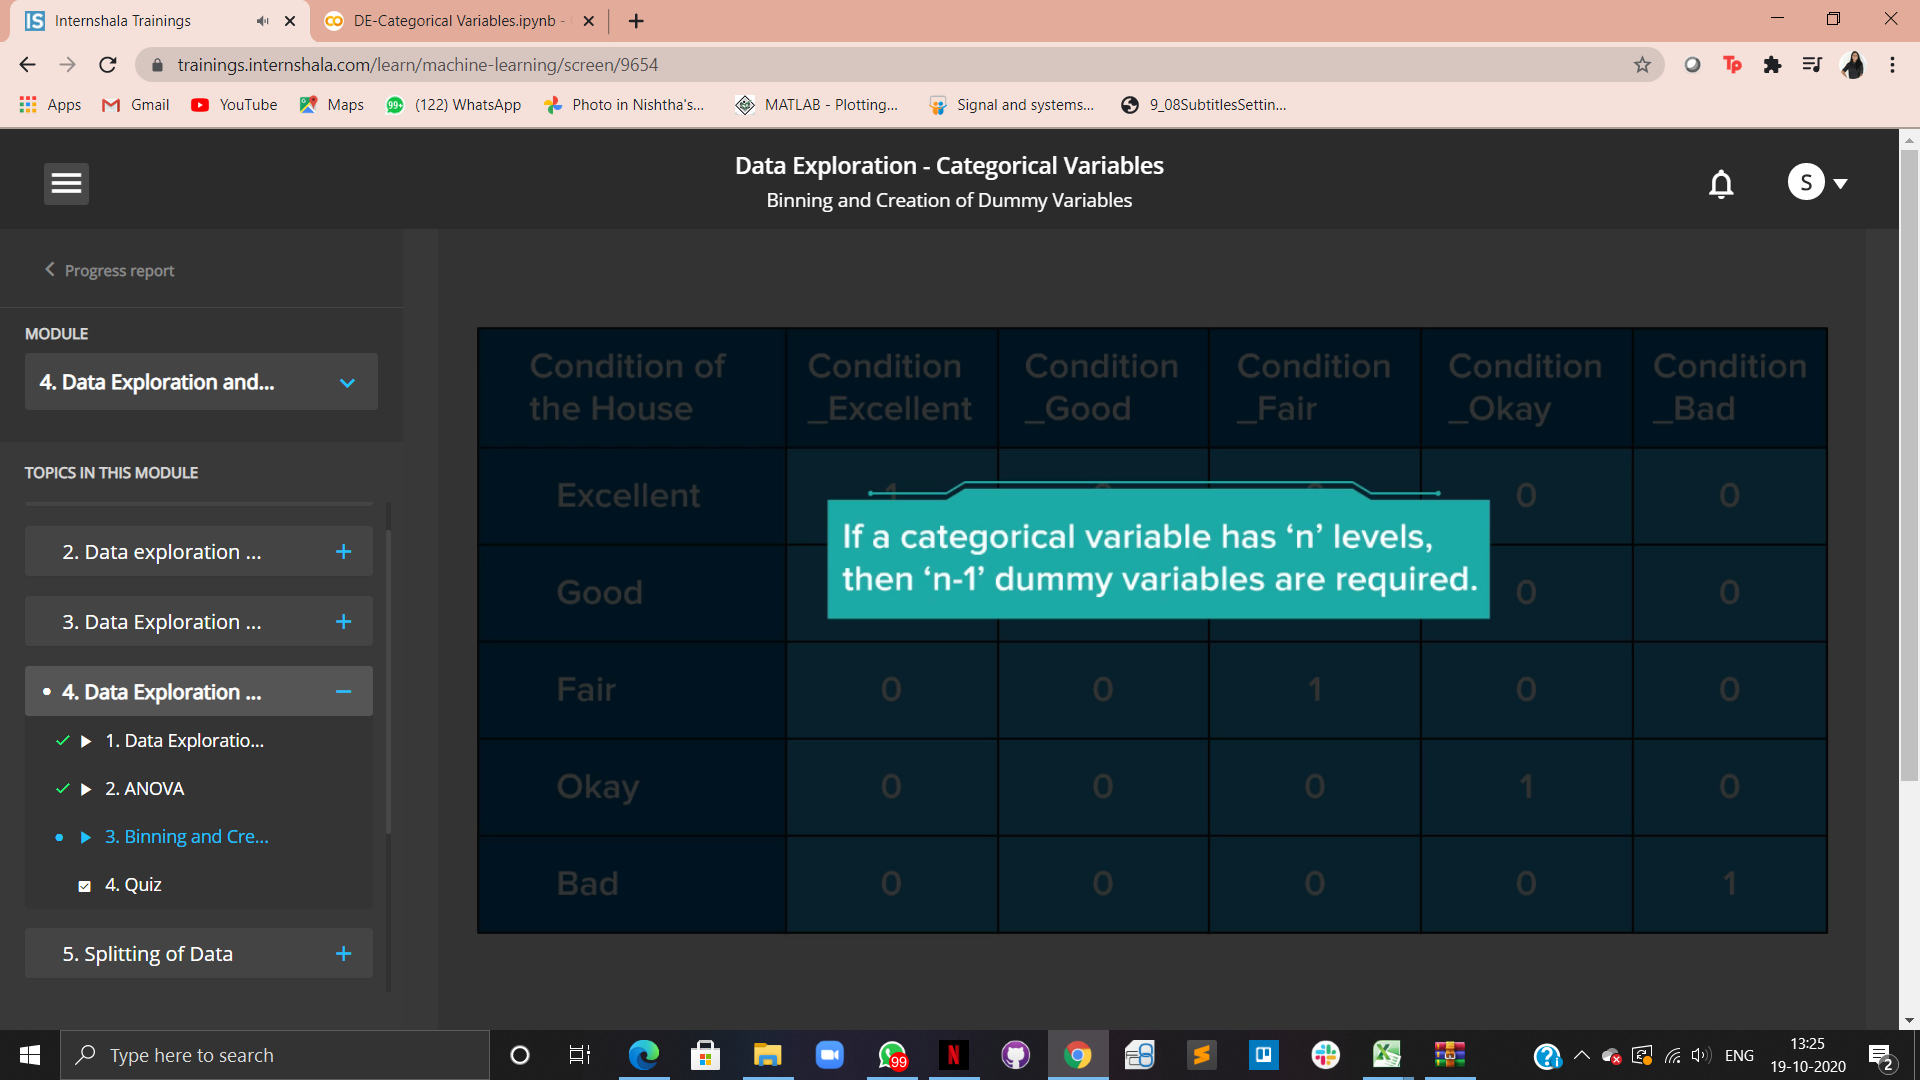

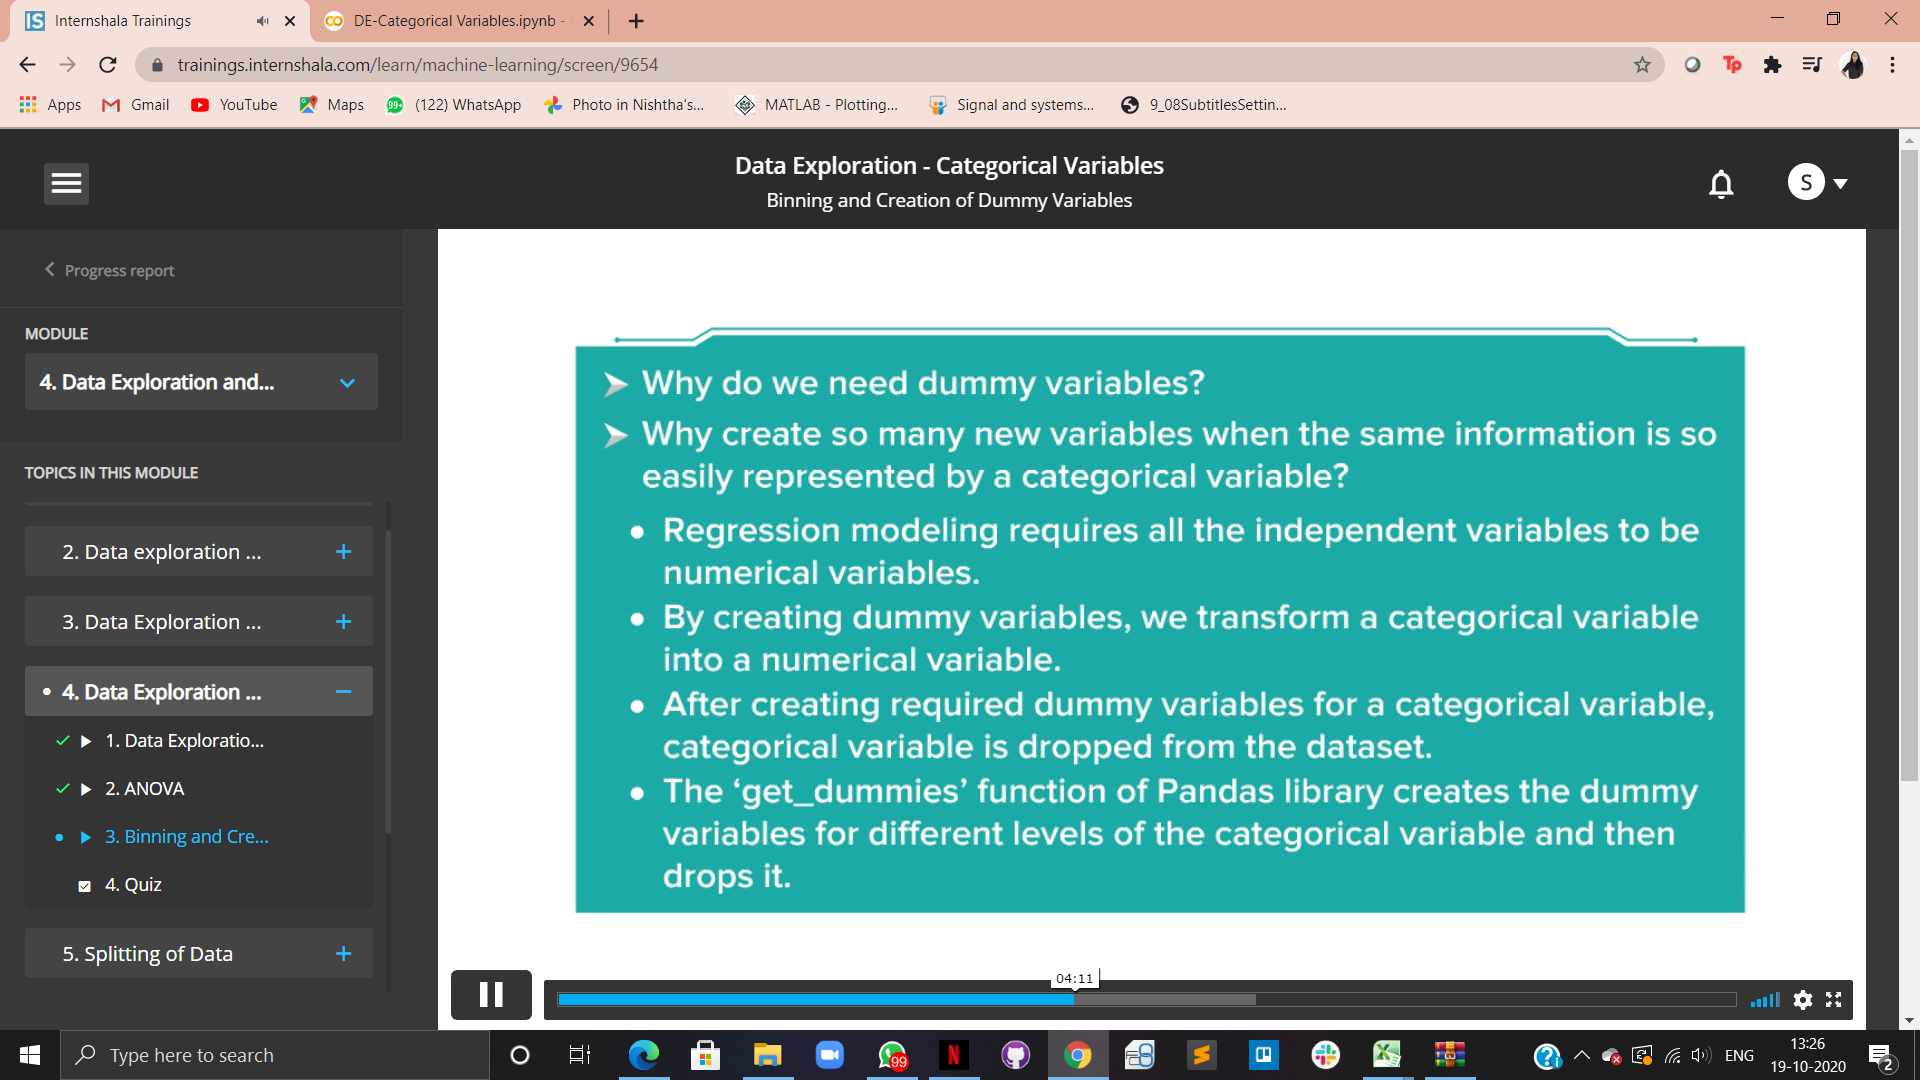

In [ ]:
dataset=pd.get_dummies(dataset,columns=['Condition_of_the_House'],drop_first=True)

In [ ]:
dataset.head()

ID  ...  Condition_of_the_House_Okay
0  7129300520  ...                            0
1  6414100192  ...                            0
2  5631500400  ...                            0
3  2487200875  ...                            0
4  1954400510  ...                            0

[5 rows x 24 columns]

In [ ]:
dataset=pd.get_dummies(dataset,columns=['Ever_Renovated','Waterfront_View'],drop_first=True)

In [ ]:
dataset.head()

ID  Sale_Price  ...  Ever_Renovated_Yes  Waterfront_View_Yes
0  7129300520      221900  ...                   0                    0
1  6414100192      538000  ...                   1                    0
2  5631500400      180000  ...                   0                    0
3  2487200875      604000  ...                   0                    0
4  1954400510      510000  ...                   0                    0

[5 rows x 24 columns]

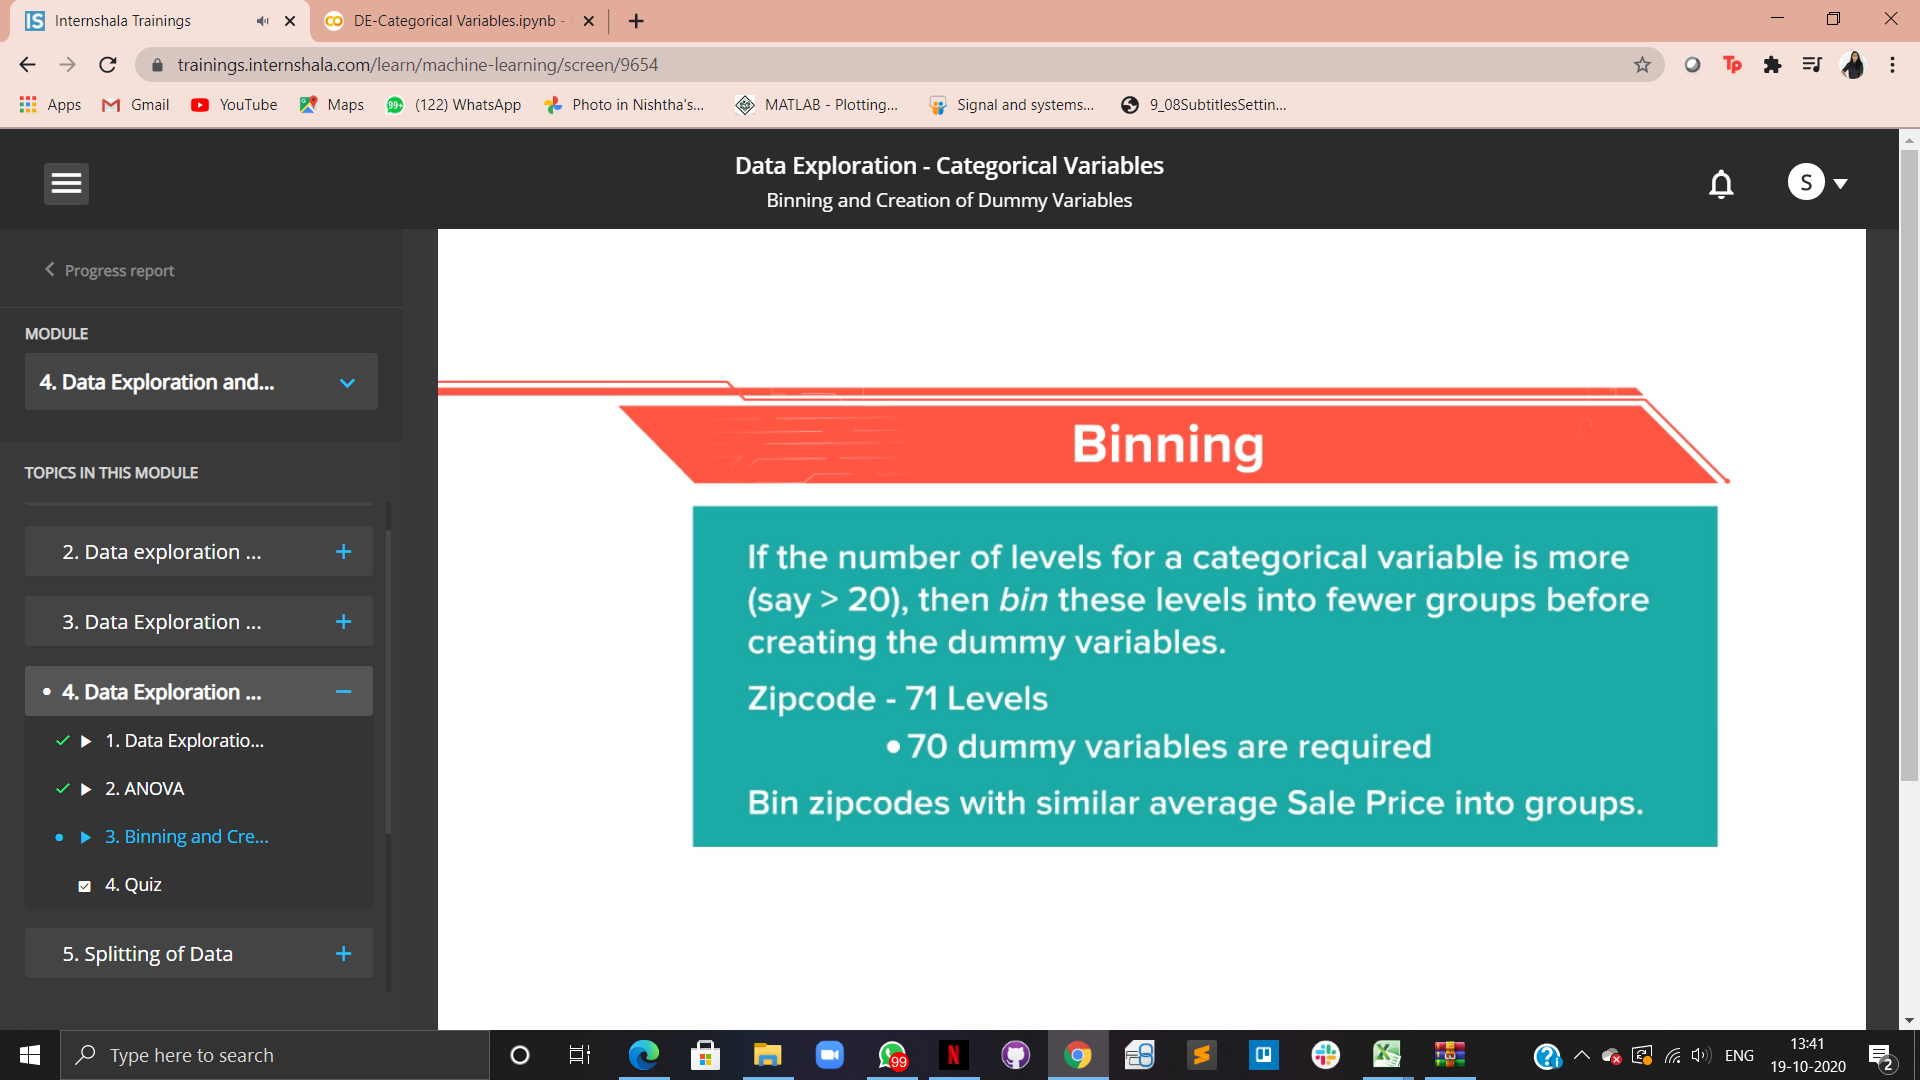

In [ ]:
ziptable=dataset.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)
ziptable.head()

Sale_Price
Zipcode               
98002    234284.035176
98168    240328.371747
98032    251296.240000
98001    280804.690608
98148    284908.596491

In [ ]:
ziptable['Zipcode_group']=pd.cut(ziptable['Sale_Price'],bins=10,
                                 labels=['Zipcode_group_0',
                                         'Zipcode_group_1',
                                         'Zipcode_group_2',
                                         'Zipcode_group_3',
                                         'Zipcode_group_4',
                                         'Zipcode_group_5',
                                         'Zipcode_group_6',
                                         'Zipcode_group_7',
                                         'Zipcode_group_8',
                                         'Zipcode_group_9'],
                                 include_lowest=True)

In [ ]:
ziptable=ziptable.drop(columns=["Sale_Price"])

merge two tables
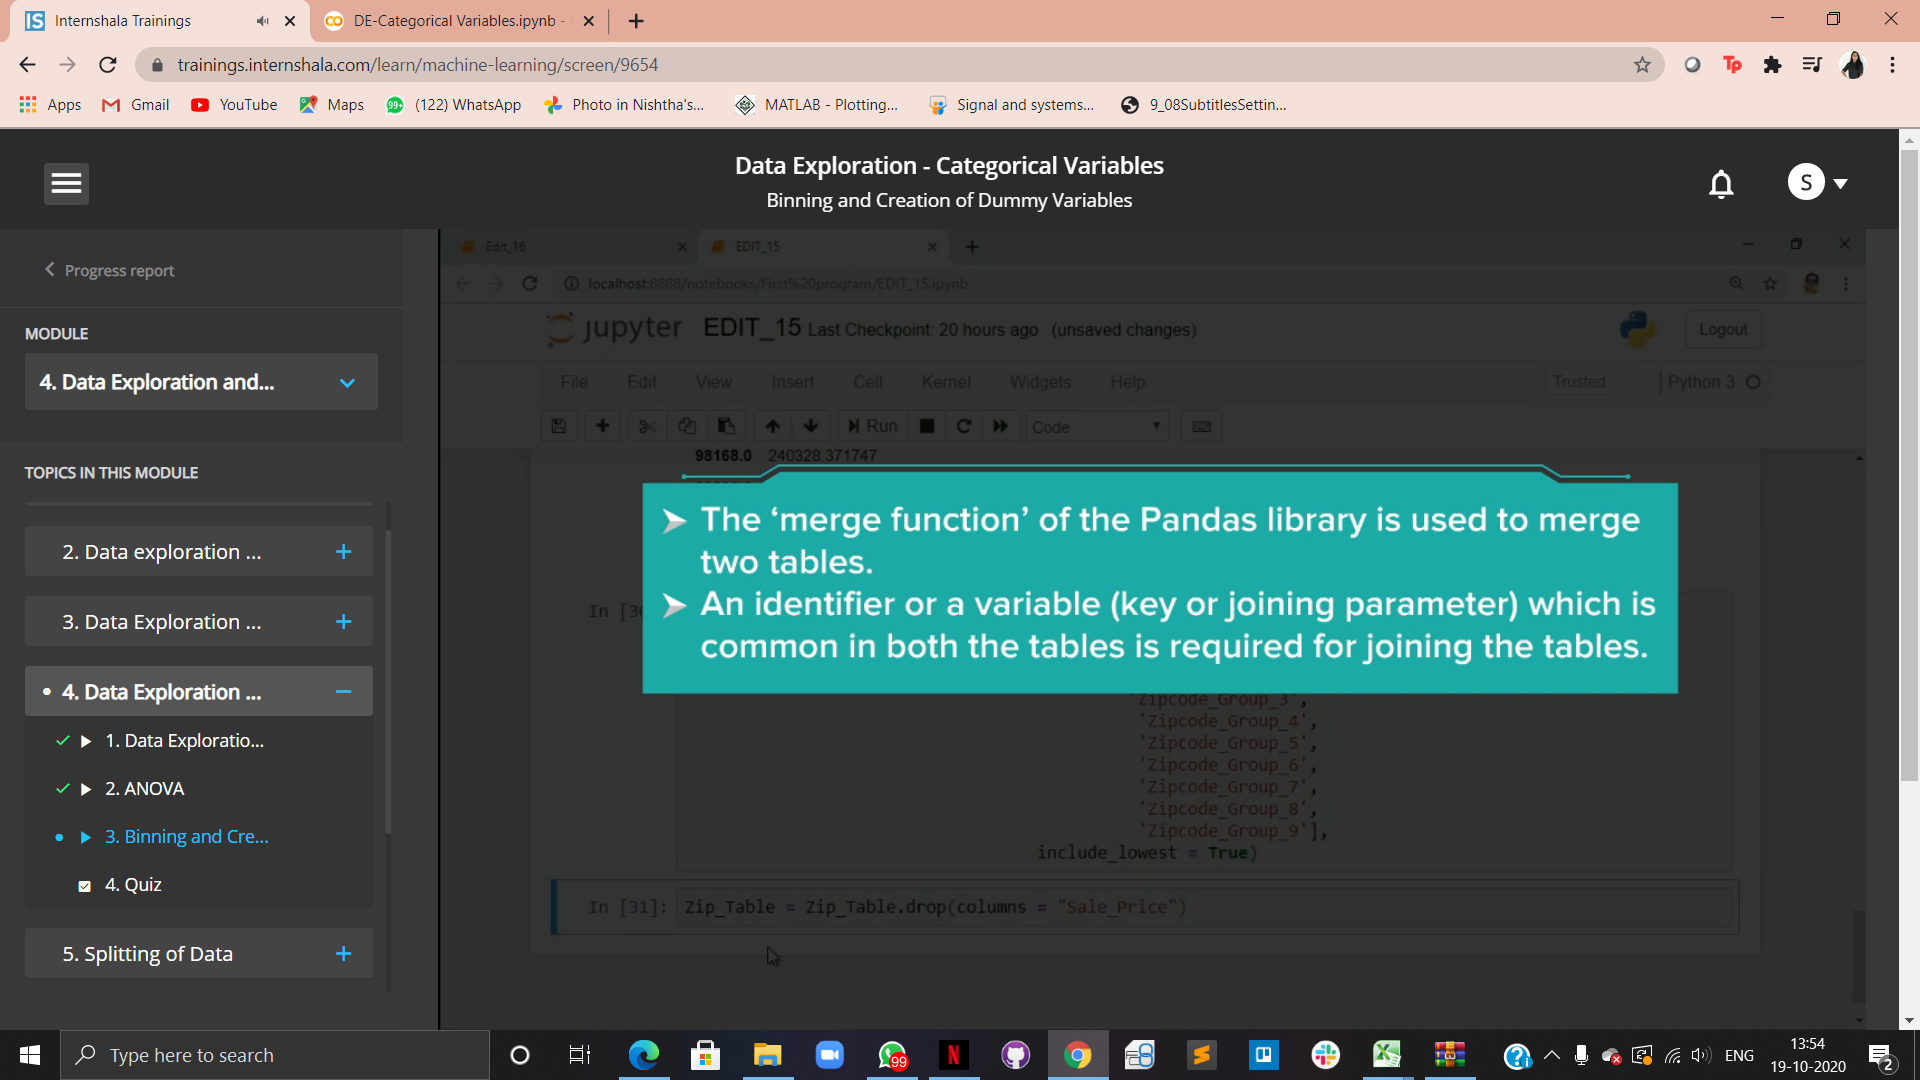

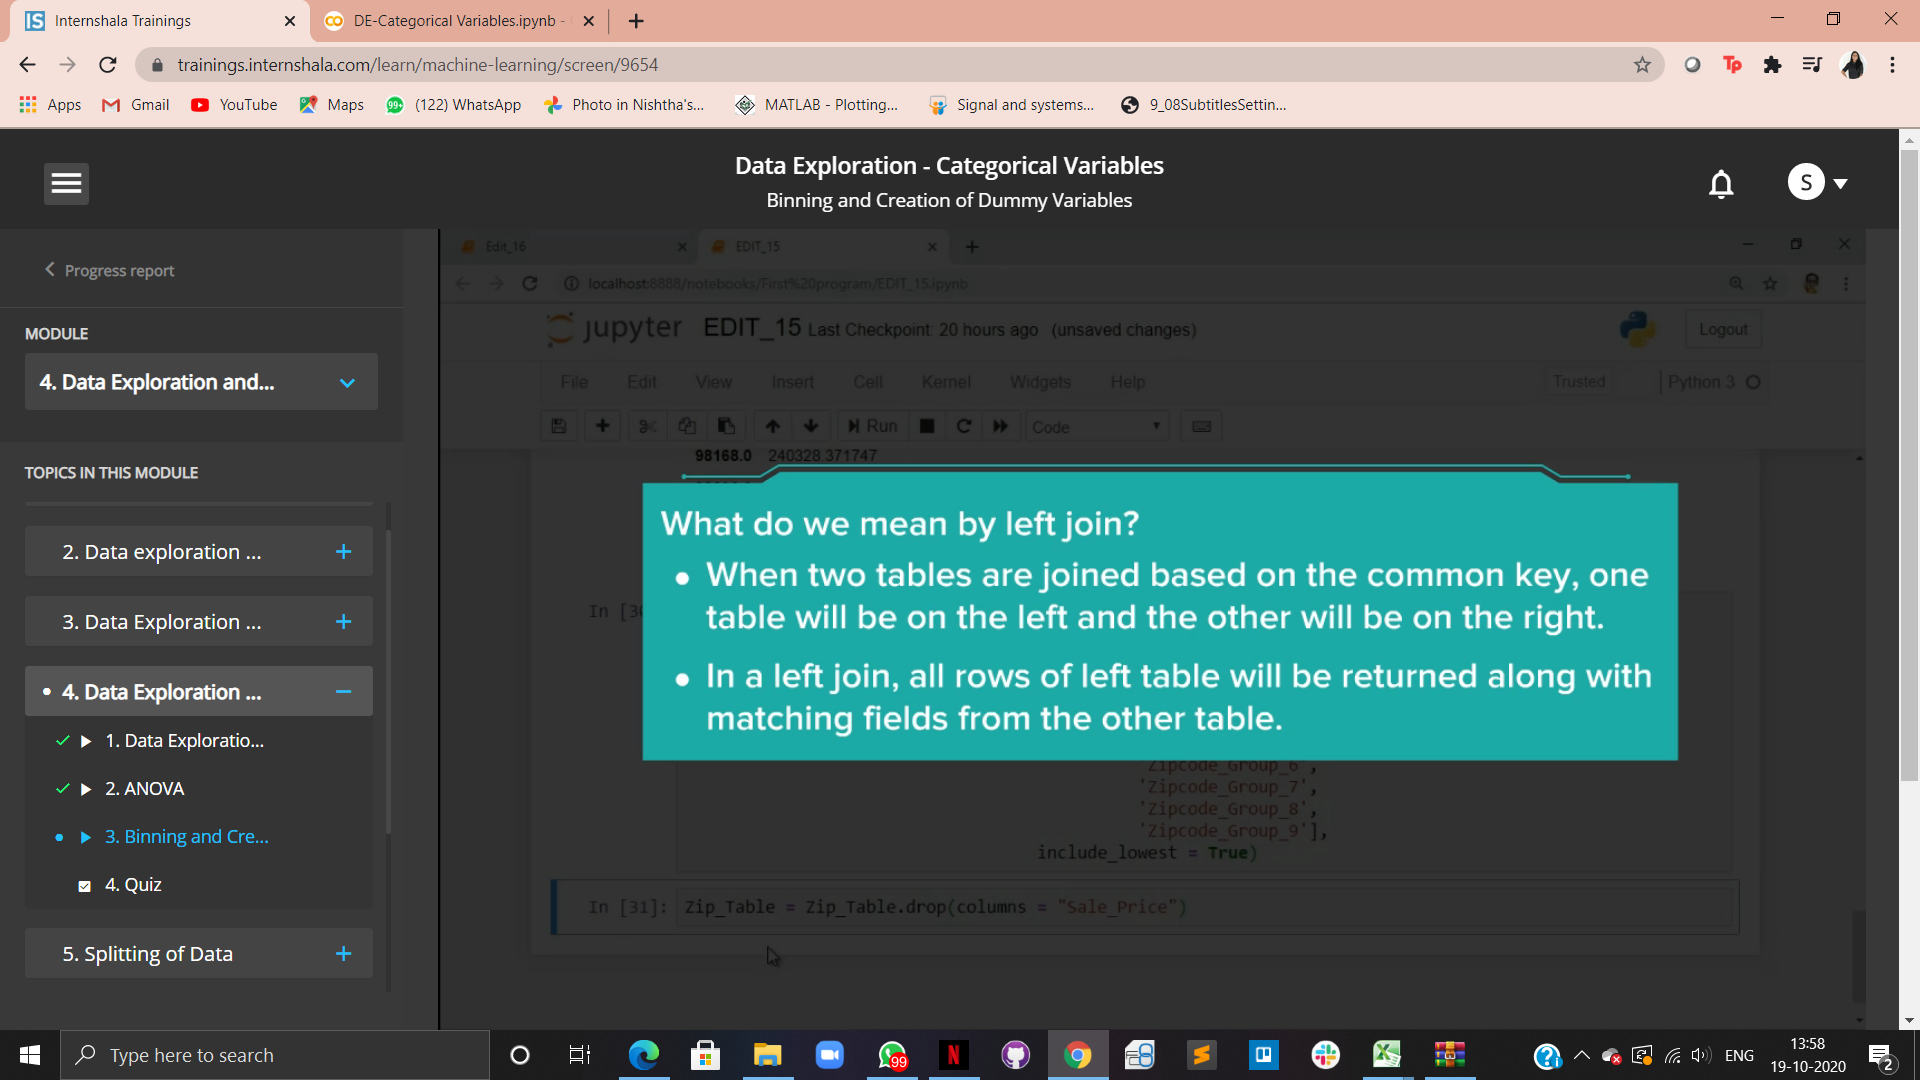

In [ ]:
dataset=pd.merge(dataset,
                  ziptable,
                  left_on='Zipcode',
                 how='left',
                 right_index=True)

In [ ]:
dataset.head()

ID  Sale_Price  ...  Waterfront_View_Yes    Zipcode_group
0  7129300520      221900  ...                    0  Zipcode_group_0
1  6414100192      538000  ...                    0  Zipcode_group_2
2  5631500400      180000  ...                    0  Zipcode_group_2
3  2487200875      604000  ...                    0  Zipcode_group_3
4  1954400510      510000  ...                    0  Zipcode_group_4

[5 rows x 25 columns]

In [ ]:
dataset=pd.get_dummies(dataset,columns=['Zipcode_group'],drop_first=True)

In [ ]:
dataset.head()

ID  ...  Zipcode_group_Zipcode_group_9
0  7129300520  ...                              0
1  6414100192  ...                              0
2  5631500400  ...                              0
3  2487200875  ...                              0
4  1954400510  ...                              0

[5 rows x 33 columns]